# Note
**(formula 1)** void_fraction = density * void_vol  
  
for some row, void_volume is 0, but void_fraction is not  
so, we can  
**(formula 2)** void_vol = void_fraction / density  

=> All problems to fix
- functional groups has missing values
- heat adsorption has (2087) missing values and 2 inf
- void_volume has (3130) 0 values (no -1 and null) 
- void_fraction has (2874) 0 and (56) -1 values
- surface_area has (14483) 0 and (56) -1 values

-> All rows which surface_area is -1, all void_fraction are -1 and void_volume are 0  
-> There are 200 rows that void_volume is 0 and void_fraction is not 0 or -1 ->  **formula 2 solves this**  
  
-> All rows which heat is null, all surface_area is 0  
-> All rows which heat is null, 2062 of void_vol is 0  
-> All rows which heat is null, 1896 of void_fraction is 0  

## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

In [2]:
def check_all_problems(df):
    print('Missing values in Functional_groups:', df['functional_groups'].isnull().sum())
    print(f"Missing values in Heat adsorption: {df['heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]'].isnull().sum()}, Inf value in Heat Adsorption: {len(df[df['heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]'] == np.inf])}")
    print(f"0 values in void_volume: {len(df[df['void_volume [cm^3/g]']==0])}")
    print(f"0 values in void_fraction: {len(df[df['void_fraction']==0])}, -1 value: {len(df[df['void_fraction']==-1])}")
    print(f"0 values in surface_area: {len(df[df['surface_area [m^2/g]']==0])}, -1 value: {len(df[df['surface_area [m^2/g]']==-1])}")

## EDA

In [3]:
df = pd.read_csv('train.csv')

In [4]:
check_all_problems(df)

Missing values in Functional_groups: 323
Missing values in Heat adsorption: 2087, Inf value in Heat Adsorption: 2
0 values in void_volume: 3130
0 values in void_fraction: 2874, -1 value: 56
0 values in surface_area: 14483, -1 value: 56


In [5]:
df

,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g]
0,mof_unit_1,1116.667429,875.240600,0.00,0.07899,0.0607,COOH-OEt,3,4,11,pcu,22.864166,6.786041,105.284502
1,mof_unit_2,2769.503842,2211.697211,603.61,0.13794,0.1040,F-OMe,10,44,57,etb,33.616780,7.147286,101.224774
2,mof_unit_3,1089.818728,773.687960,788.50,0.14874,0.1262,OMe-COOH,2,22,24,pcu,19.263726,6.347967,118.987011
3,mof_unit_4,2205.198301,1304.638720,1441.53,0.21814,0.2220,H-SO3H,9,17,24,sra,25.701377,6.190085,187.626004
4,mof_unit_5,1137.800963,901.736120,0.00,0.07778,0.0591,NHMe-OH,2,1,22,pcu,30.001838,6.478063,79.210001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68608,mof_unit_68609,1188.302573,1001.700216,0.00,0.00000,0.0000,Pr-F,3,4,24,pcu,24.131770,NaN,-12.943652
68609,mof_unit_68610,1506.660363,1493.296496,0.00,0.01108,0.0000,SO3H,10,42,46,etb,6.071818,NaN,-12.985582
68610,mof_unit_68611,2035.532738,1959.518320,0.00,0.00000,0.0000,OPr,4,14,22,acs,9.876134,NaN,-13.187635
68611,mof_unit_68612,3985.426053,3638.677280,0.00,0.00000,0.0000,OPr-Me,4,4,15,acs,5.285051,inf,15.672698


In [6]:
df.describe()

,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],metal_linker,organic_linker1,organic_linker2,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g]
count,68613.000000,68613.000000,68613.000000,68613.000000,68613.000000,68613.000000,68613.000000,68613.000000,68613.000000,6.652600e+04,68613.000000
mean,3447.363207,1656.761858,1666.766690,0.259164,0.376052,4.203271,11.919257,20.583592,28.599681,inf,120.002797
std,4840.665782,1259.086320,1366.317223,0.164758,0.476452,3.144905,10.783136,10.100870,153.806887,NaN,89.573112
min,606.576038,439.281220,-1.000000,-1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.612299e+00,-44.285746
25%,1556.075767,893.662700,511.930000,0.142580,0.119000,2.000000,4.000000,14.000000,12.818366,5.267536e+00,65.537205
50%,2190.442847,1259.699253,1542.830000,0.242620,0.248400,3.000000,10.000000,20.000000,19.689890,5.899089e+00,98.552185
75%,3605.836441,1897.163660,2517.960000,0.345120,0.443800,4.000000,16.000000,25.000000,32.954388,6.768365e+00,163.139540
max,223964.854408,22595.928960,7083.530000,0.872060,6.610100,12.000000,59.000000,59.000000,29369.777780,inf,736.061636


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68613 entries, 0 to 68612
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   MOFname                                        68613 non-null  object 
 1   volume [A^3]                                   68613 non-null  float64
 2   weight [u]                                     68613 non-null  float64
 3   surface_area [m^2/g]                           68613 non-null  float64
 4   void_fraction                                  68613 non-null  float64
 5   void_volume [cm^3/g]                           68613 non-null  float64
 6   functional_groups                              68290 non-null  object 
 7   metal_linker                                   68613 non-null  int64  
 8   organic_linker1                                68613 non-null  int64  
 9   organic_linker2                                686

In [8]:
len(df['functional_groups'].unique())

401

In [9]:
len(df['metal_linker'].unique())

7

In [10]:
len(df['topology'].unique())

11

## Columns with problems

### heat adsorption

In [11]:
df['heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]'].unique()

array([6.786041, 7.147286, 6.347967, ..., 3.80415 ,      nan,      inf])

In [12]:
df[df['heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]']==np.inf]

,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g]
68611,mof_unit_68612,3985.426053,3638.67728,0.0,0.00000,0.0,OPr-Me,4,4,15,acs,5.285051,inf,15.672698
68612,mof_unit_68613,1591.009408,2071.21900,0.0,0.01609,0.0,I-OEt,2,9,16,pcu,2.621272,inf,3.144708


In [13]:
df[df['heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]'].isnull()]

,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g]
66524,mof_unit_66525,1416.010294,1252.638800,0.0,0.00000,0.0,NHMe,9,5,2,sra,13.588249,NaN,22.227887
66525,mof_unit_66526,1136.688169,1031.378160,0.0,0.00000,0.0,HCO-OH,3,4,9,pcu,0.000000,NaN,23.608092
66526,mof_unit_66527,1124.694354,1071.157320,0.0,0.00000,0.0,NO2-NH2,3,12,15,pcu,29369.777780,NaN,22.717174
66527,mof_unit_66528,1885.191588,1871.515816,0.0,0.00000,0.0,OH-OMe,10,48,50,etb,17.738073,NaN,9.427192
66528,mof_unit_66529,1830.892351,1491.279520,0.0,0.00000,0.0,NH2-OPr,3,16,22,pcu,0.000000,NaN,18.008531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68606,mof_unit_68607,949.067112,753.787520,0.0,0.00000,0.0,Pr,2,10,18,pcu,0.000000,NaN,-9.124771
68607,mof_unit_68608,1202.182553,1042.538240,0.0,0.00000,0.0,Ph-Cl,3,12,24,pcu,0.000000,NaN,-10.954315
68608,mof_unit_68609,1188.302573,1001.700216,0.0,0.00000,0.0,Pr-F,3,4,24,pcu,24.131770,NaN,-12.943652
68609,mof_unit_68610,1506.660363,1493.296496,0.0,0.01108,0.0,SO3H,10,42,46,etb,6.071818,NaN,-12.985582


In [14]:
df[df['heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]'].isnull()]['surface_area [m^2/g]'].value_counts()

0.0    2087
Name: surface_area [m^2/g], dtype: int64

In [15]:
df[df['heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]'].isnull()]['void_fraction'].value_counts()

0.00000    1896
0.00419       2
0.01234       2
0.00694       2
0.00243       2
           ... 
0.00878       1
0.00354       1
0.00181       1
0.02260       1
0.01322       1
Name: void_fraction, Length: 185, dtype: int64

In [16]:
df[df['heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]'].isnull()]['void_volume [cm^3/g]'].value_counts()

0.0000    2062
0.0137       2
0.0104       2
0.0165       2
0.0138       2
0.0156       2
0.0127       2
0.0179       1
0.0149       1
0.0158       1
0.0141       1
0.0134       1
0.0164       1
0.0122       1
0.0162       1
0.0119       1
0.0118       1
0.0161       1
0.0128       1
0.0120       1
Name: void_volume [cm^3/g], dtype: int64

**Note:** If we want to fill missing values in heat, we want to find the way to change *surface_area, void_fraction, void_volume* accordingly unless we will risk a chance to give wrong data for model to learn

In [17]:
df

,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g]
0,mof_unit_1,1116.667429,875.240600,0.00,0.07899,0.0607,COOH-OEt,3,4,11,pcu,22.864166,6.786041,105.284502
1,mof_unit_2,2769.503842,2211.697211,603.61,0.13794,0.1040,F-OMe,10,44,57,etb,33.616780,7.147286,101.224774
2,mof_unit_3,1089.818728,773.687960,788.50,0.14874,0.1262,OMe-COOH,2,22,24,pcu,19.263726,6.347967,118.987011
3,mof_unit_4,2205.198301,1304.638720,1441.53,0.21814,0.2220,H-SO3H,9,17,24,sra,25.701377,6.190085,187.626004
4,mof_unit_5,1137.800963,901.736120,0.00,0.07778,0.0591,NHMe-OH,2,1,22,pcu,30.001838,6.478063,79.210001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68608,mof_unit_68609,1188.302573,1001.700216,0.00,0.00000,0.0000,Pr-F,3,4,24,pcu,24.131770,NaN,-12.943652
68609,mof_unit_68610,1506.660363,1493.296496,0.00,0.01108,0.0000,SO3H,10,42,46,etb,6.071818,NaN,-12.985582
68610,mof_unit_68611,2035.532738,1959.518320,0.00,0.00000,0.0000,OPr,4,14,22,acs,9.876134,NaN,-13.187635
68611,mof_unit_68612,3985.426053,3638.677280,0.00,0.00000,0.0000,OPr-Me,4,4,15,acs,5.285051,inf,15.672698


In [18]:
test = df['CO2_working_capacity [mL/g]'] / df['heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]']
test

0        15.514864
1        14.162687
2        18.744113
3        30.310732
4        12.227421
           ...    
68608          NaN
68609          NaN
68610          NaN
68611     0.000000
68612     0.000000
Length: 68613, dtype: float64

In [19]:
test[~test.isna()].std()

11.780698568806859

In [20]:
test[~test.isna()].mean()

19.0017607967446

### void volume

In [21]:
df['void_volume [cm^3/g]'].value_counts()

0.0000    3130
0.0882      28
0.1225      27
0.1059      27
0.0825      27
          ... 
1.7170       1
0.9288       1
1.6824       1
1.6778       1
1.3451       1
Name: void_volume [cm^3/g], Length: 12609, dtype: int64

In [22]:
0 in df['void_volume [cm^3/g]']

True

In [23]:
df['void_volume [cm^3/g]'].isin([-1]).sum()

0

In [24]:
df['void_volume [cm^3/g]'].isnull().sum()

0

### void fraction

In [25]:
df['void_fraction'].value_counts()

 0.00000    2874
-1.00000      56
 0.26447       9
 0.12938       8
 0.23432       8
            ... 
 0.09815       1
 0.12310       1
 0.18494       1
 0.33454       1
 0.03258       1
Name: void_fraction, Length: 37333, dtype: int64

In [26]:
0 in df['void_fraction']

True

In [27]:
df['void_fraction'].isin([-1]).sum()

56

### surface_area

In [28]:
df['surface_area [m^2/g]'].value_counts()

 0.00       14483
-1.00          56
 1695.09        4
 1542.49        4
 2235.80        4
            ...  
 1795.40        1
 1804.60        1
 2760.37        1
 598.87         1
 1543.37        1
Name: surface_area [m^2/g], Length: 50413, dtype: int64

In [29]:
df['surface_area [m^2/g]'].isin([0]).sum()

14483

In [30]:
df['surface_area [m^2/g]'].isin([-1]).sum()

56

In [31]:
df[df['surface_area [m^2/g]']==-1]

,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g]
883,mof_unit_884,3084.500504,2201.756440,-1.0,-1.0,0.0,NO2-OH,4,13,21,acs,283.074231,7.592979,315.215814
1630,mof_unit_1631,2065.502764,1946.135540,-1.0,-1.0,0.0,OMe-NO2,4,1,9,acs,159.794386,10.334164,154.626212
2463,mof_unit_2464,4332.123412,2391.006390,-1.0,-1.0,0.0,I-NO2,4,17,25,acs,133.241697,5.433424,185.841197
2750,mof_unit_2751,6242.980835,3120.907760,-1.0,-1.0,0.0,NHMe-NO2,4,7,27,acs,154.557976,5.612676,180.784572
3376,mof_unit_3377,6266.570349,3616.971760,-1.0,-1.0,0.0,OEt-NO2,4,7,27,acs,304.261535,6.251191,377.698443
3845,mof_unit_3846,4114.140596,2880.339160,-1.0,-1.0,0.0,NH2-NO2,4,6,17,acs,232.393547,6.559723,216.101214
3930,mof_unit_3931,4014.788213,4205.486240,-1.0,-1.0,0.0,COOH-NO2,4,1,11,acs,180.994177,11.017116,144.547298
7385,mof_unit_7386,5149.814191,2703.225000,-1.0,-1.0,0.0,CN-NO2,4,6,7,acs,228.799688,5.905715,222.573205
8564,mof_unit_8565,2007.475254,1975.886720,-1.0,-1.0,0.0,NO2-NH2,4,1,22,acs,210.667312,12.653423,185.477698
9495,mof_unit_9496,1688.338733,1308.420680,-1.0,-1.0,0.0,NO2-Et,4,5,11,acs,147.897726,7.059560,186.046387


In [32]:
# min of surface area without 0 and -1 value
df[~df['surface_area [m^2/g]'].isin([0, -1])]['surface_area [m^2/g]'].min()

37.22

### Check some error of values comparision

In [33]:
df[df['void_volume [cm^3/g]'] >= df['volume [A^3]']]

,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g]


---

There are many rows that BOTH void_volume and void_fraction missing.  
Since we have the formula to calculate void_fraction from void_vol, let's see where there are some row only 1 of them is missing. So we can derive it from the formula.

In [34]:
df[(df['void_volume [cm^3/g]']==0) & ((df['void_fraction']!=0) & (df['void_fraction']!=-1))]

,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g]
615,mof_unit_616,2986.257706,2321.749040,0.0,0.00286,0.0,Pr,9,18,29,sra,14.075132,9.950743,73.746132
5772,mof_unit_5773,2208.884643,2263.789760,0.0,0.00815,0.0,Br-CN,9,16,18,sra,48.732697,9.463714,173.301652
6631,mof_unit_6632,1595.944227,1444.496040,0.0,0.01300,0.0,NO2-OH,9,22,24,sra,36.790319,8.458382,110.950259
8227,mof_unit_8228,1686.566488,1342.710140,0.0,0.00789,0.0,OPr-CN,9,11,2,sra,12.849728,9.628730,81.840165
9625,mof_unit_9626,3951.837174,3858.143280,0.0,0.01559,0.0,NO2-Ph,4,1,24,acs,13.325337,7.505813,82.983320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68589,mof_unit_68590,2981.283155,2629.066240,0.0,0.00486,0.0,Cl-CN,9,18,29,sra,4.613801,NaN,-3.478823
68593,mof_unit_68594,1524.505449,1685.041936,0.0,0.00699,0.0,NO2-Br,10,46,48,etb,9.460791,NaN,-3.792634
68595,mof_unit_68596,3760.489888,3343.200672,0.0,0.01221,0.0,NHMe-H,10,42,42,etb,0.227160,NaN,-4.115523
68609,mof_unit_68610,1506.660363,1493.296496,0.0,0.01108,0.0,SO3H,10,42,46,etb,6.071818,NaN,-12.985582


In [35]:
df[(df['void_fraction']==0) & ((df['void_volume [cm^3/g]']!=0) & (df['void_volume [cm^3/g]']!=-1))]

,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g]


---

In [36]:
df.columns

Index(['MOFname', 'volume [A^3]', 'weight [u]', 'surface_area [m^2/g]',
       'void_fraction', 'void_volume [cm^3/g]', 'functional_groups',
       'metal_linker', 'organic_linker1', 'organic_linker2', 'topology',
       'CO2/N2_selectivity', 'heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]',
       'CO2_working_capacity [mL/g]'],
      dtype='object')

In [37]:
plot_col = ['volume [A^3]', 'weight [u]', 'surface_area [m^2/g]',
       'void_fraction', 'void_volume [cm^3/g]',
       'metal_linker', 'organic_linker1', 'organic_linker2',
       'CO2/N2_selectivity',
       'CO2_working_capacity [mL/g]']

In [38]:
# # histograms
# plt.figure(figsize=(16,10))

# for idx, col in enumerate(plot_col, start=1):
#     sns.displot(df[col], kde=True)

# plt.show()

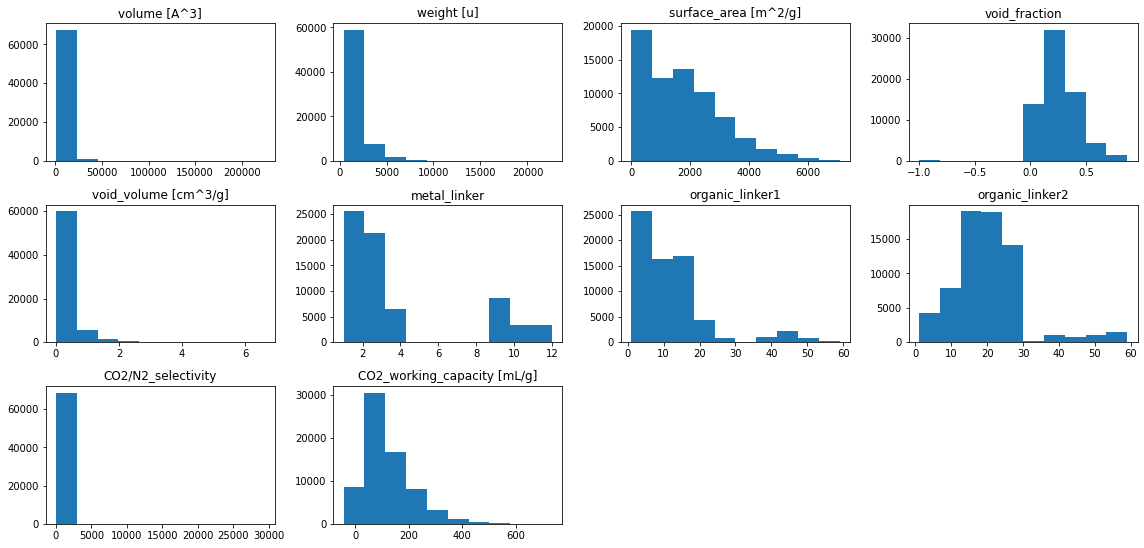

In [39]:
# histograms
fig = plt.figure(figsize=(16,10))

for idx, col in enumerate(plot_col, start=1):
    fig.add_subplot(4,4,idx)
    plt.title(col)
    plt.hist(df[col])
    plt.tight_layout()

plt.show()

### Try transforming these data to normal distribution and see the performance in training
(Note: no improvement in model training (worse for some models),just train a bit faster)

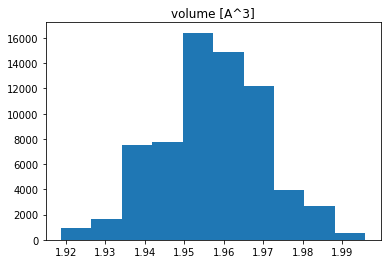

In [40]:
col = 'volume [A^3]'
plt.hist(boxcox(df[col], -0.5))
plt.title(col)
plt.show()

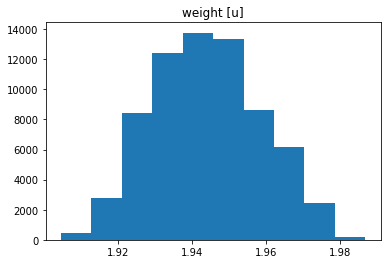

In [41]:
col = 'weight [u]'
plt.hist(boxcox(df[col], -0.5))
plt.title(col)
plt.show()

### Volume outlier

In [42]:
quantiles = [0.8, 0.85, 0.9, 0.95, 0.97, 0.98, 0.99, 0.995, 0.999, 0.9999]
col = 'volume [A^3]'
print(f'{col.title()} min:', df[col].min())
print(f'{col.title()} mean:', df[col].mean())
print(f'{col.title()} max:', df[col].max())
for q in quantiles:
    print(f'Quantile at {q*100} of {col.title()}:',df[col].quantile(q))

Volume [A^3] min: 606.576038
Volume [A^3] mean: 3447.363207220461
Volume [A^3] max: 223964.854408
Quantile at 80.0 of Volume [A^3]: 4048.6442352000104
Quantile at 85.0 of Volume [A^3]: 4586.262598999998
Quantile at 90.0 of Volume [A^3]: 5572.687384400007
Quantile at 95.0 of Volume [A^3]: 9653.10061879993
Quantile at 97.0 of Volume [A^3]: 14912.068997799997
Quantile at 98.0 of Volume [A^3]: 19796.18778707995
Quantile at 99.0 of Volume [A^3]: 26615.206935280003
Quantile at 99.5 of Volume [A^3]: 32714.54378730001
Quantile at 99.9 of Volume [A^3]: 49078.32990605601
Quantile at 99.99 of Volume [A^3]: 86414.49819594099


In [43]:
df['volume [A^3]'].sort_values()[-50:]

60297     55861.774607
65882     56407.194880
60363     56531.771488
63571     56590.856530
64040     56733.544550
63804     57061.995337
65706     57150.033320
60127     57352.966092
66039     57369.428212
60690     57879.925064
64322     58049.742034
60927     58237.630580
65920     59204.061835
61102     59272.716668
61216     59322.291997
65395     59380.692659
60449     59445.667929
61269     59565.652616
60982     59679.565243
66012     59697.432039
61816     59980.914445
63993     60211.630108
61735     67262.524418
60823     67370.420428
61452     70177.083485
64004     70354.983049
60533     70430.654362
63746     70656.249382
60939     70843.013897
61242     71035.806327
62771     71126.237228
61784     71181.045662
65092     71227.216894
61678     71291.539452
61852     71366.559187
63533     71544.314114
64732     71730.020220
63646     71770.497017
65528     72035.236328
63324     72772.027514
60919     79572.949868
62264     81211.506835
65561     83740.750531
66222    10

### Weight outlier

In [44]:
quantiles = [0.8, 0.85, 0.9, 0.95, 0.97, 0.98, 0.99, 0.995, 0.999]
col = 'weight [u]'
print(f'{col.title()} min:', df[col].min())
print(f'{col.title()} mean:', df[col].mean())
print(f'{col.title()} max:', df[col].max())
for q in quantiles:
    print(f'Quantile at {q*100} of {col.title()}:',df[col].quantile(q))

Weight [U] min: 439.28122
Weight [U] mean: 1656.7618582920632
Weight [U] max: 22595.92896
Quantile at 80.0 of Weight [U]: 2162.1552514000027
Quantile at 85.0 of Weight [U]: 2542.994307999999
Quantile at 90.0 of Weight [U]: 3145.98792
Quantile at 95.0 of Weight [U]: 4166.885628799996
Quantile at 97.0 of Weight [U]: 4929.083360000001
Quantile at 98.0 of Weight [U]: 5534.286390399991
Quantile at 99.0 of Weight [U]: 6593.811795200005
Quantile at 99.5 of Weight [U]: 7660.772842400005
Quantile at 99.9 of Weight [U]: 10593.794872536018


In [45]:
df['weight [u]'].sort_values()[-50:]

64196    11517.204720
56814    11592.271680
57400    11640.551360
24366    11686.967040
65128    11714.411827
5277     11734.511680
61176    11797.490400
60294    11811.226240
45021    11835.511840
22532    11868.456640
23303    11868.456640
3579     12118.878720
63312    12143.991520
65706    12188.824640
62609    12308.723405
51898    12366.906240
13154    12454.938240
3187     12459.072000
61556    12609.580800
65653    12842.545360
62238    12938.215840
36264    12984.662400
43285    13033.518720
23983    13072.694400
62918    13161.999880
55292    13309.862080
61943    13417.510400
62692    13795.483040
948      13902.848640
42237    13995.014400
45208    13997.702400
35563    14570.336794
39006    14571.601920
63008    15185.094707
61735    15380.819610
24435    16135.752640
15299    16135.752640
38126    16643.452800
34401    16983.148800
37836    17071.180800
52562    17339.990400
44178    17452.035840
26812    17671.695040
61647    18550.944960
62264    18850.762560
55245    2

### void_volume [cm^3/g] outlier

In [46]:
quantiles = [0.8, 0.85, 0.9, 0.95, 0.97, 0.98, 0.99, 0.995, 0.999]
col = 'void_volume [cm^3/g]'
print(f'{col.title()} min:', df[col].min())
print(f'{col.title()} mean:', df[col].mean())
print(f'{col.title()} max:', df[col].max())
for q in quantiles:
    print(f'Quantile at {q*100} of {col.title()}:',df[col].quantile(q))

Void_Volume [Cm^3/G] min: 0.0
Void_Volume [Cm^3/G] mean: 0.3760521548394623
Void_Volume [Cm^3/G] max: 6.6101
Quantile at 80.0 of Void_Volume [Cm^3/G]: 0.5064600000000006
Quantile at 85.0 of Void_Volume [Cm^3/G]: 0.5947199999999997
Quantile at 90.0 of Void_Volume [Cm^3/G]: 0.7582999999999998
Quantile at 95.0 of Void_Volume [Cm^3/G]: 1.1897
Quantile at 97.0 of Void_Volume [Cm^3/G]: 1.588
Quantile at 98.0 of Void_Volume [Cm^3/G]: 1.8996599999999948
Quantile at 99.0 of Void_Volume [Cm^3/G]: 2.511824000000022
Quantile at 99.5 of Void_Volume [Cm^3/G]: 3.1926520000000016
Quantile at 99.9 of Void_Volume [Cm^3/G]: 4.502752000000025


In [47]:
df['void_volume [cm^3/g]'].sort_values()[-50:]

63772    4.6312
63506    4.6312
62422    4.6376
63996    4.6436
66176    4.6447
65561    4.6511
60690    4.6513
62265    4.6665
63518    4.6795
64765    4.6844
63533    4.6887
65612    4.6889
61551    4.7233
61752    4.7315
62214    4.7317
61598    4.7317
62753    4.7317
62886    4.7317
62049    4.7331
64322    4.7378
61332    4.7747
64298    4.7884
60927    4.8008
63018    4.8056
61216    4.8226
64605    4.8348
61559    4.8570
61398    4.8798
60363    4.9322
61991    4.9691
63645    4.9830
60533    4.9870
65992    5.0055
63422    5.0098
64136    5.0126
65092    5.0373
63804    5.0632
62861    5.0709
61784    5.0973
63746    5.1453
61452    5.2750
65749    5.4305
61816    5.5166
64773    5.5762
60287    5.6258
61678    5.7122
63106    5.7286
66516    6.0965
61852    6.1825
60033    6.6101
Name: void_volume [cm^3/g], dtype: float64

### CO2/N2_selectivity outlier

In [48]:
quantiles = [0.8, 0.85, 0.9, 0.95, 0.97, 0.98, 0.99, 0.995, 0.999]
col = 'CO2/N2_selectivity'
print(f'{col.title()} min:', df[col].min())
print(f'{col.title()} mean:', df[col].mean())
print(f'{col.title()} max:', df[col].max())
for q in quantiles:
    print(f'Quantile at {q*100} of {col.title()}:',df[col].quantile(q))

Co2/N2_Selectivity min: 0.0
Co2/N2_Selectivity mean: 28.599681259069232
Co2/N2_Selectivity max: 29369.77778
Quantile at 80.0 of Co2/N2_Selectivity: 37.878688328
Quantile at 85.0 of Co2/N2_Selectivity: 44.720313043999994
Quantile at 90.0 of Co2/N2_Selectivity: 55.26942935400001
Quantile at 95.0 of Co2/N2_Selectivity: 73.33722133399989
Quantile at 97.0 of Co2/N2_Selectivity: 86.63978215639999
Quantile at 98.0 of Co2/N2_Selectivity: 97.32319310079998
Quantile at 99.0 of Co2/N2_Selectivity: 115.61507856800006
Quantile at 99.5 of Co2/N2_Selectivity: 137.54214119800002
Quantile at 99.9 of Co2/N2_Selectivity: 225.2594182208007


In [49]:
df['CO2/N2_selectivity'].sort_values()[-50:]

6786       292.774423
9593       294.165168
23888      298.955374
3376       304.261535
68580      304.547539
66578      306.137500
54125      333.053498
33276      339.826358
22777      346.424250
23122      368.251369
68542      391.934650
28328      396.179060
42793      398.812043
67181      418.589655
47563      435.219913
21682      439.539400
66573      440.800000
68601      454.265353
68398      522.880000
68600      546.346667
68375      602.933333
66633      604.652381
62864      661.004012
66541      676.142995
66661      710.667968
66537      730.616965
68468      832.059259
62838      914.244140
66640      980.032570
68570      993.911111
68327     1059.393939
66675     1153.494389
66667     1890.001778
67773     2184.129167
66583     2190.963889
68599     2276.833333
67832     2579.412613
68497     2697.906173
66611     3067.379487
66637     3533.559420
67923     3567.362712
68597     4082.551111
68366     5766.148148
68476     5877.333333
68558     7110.154667
66618     

<AxesSubplot:>

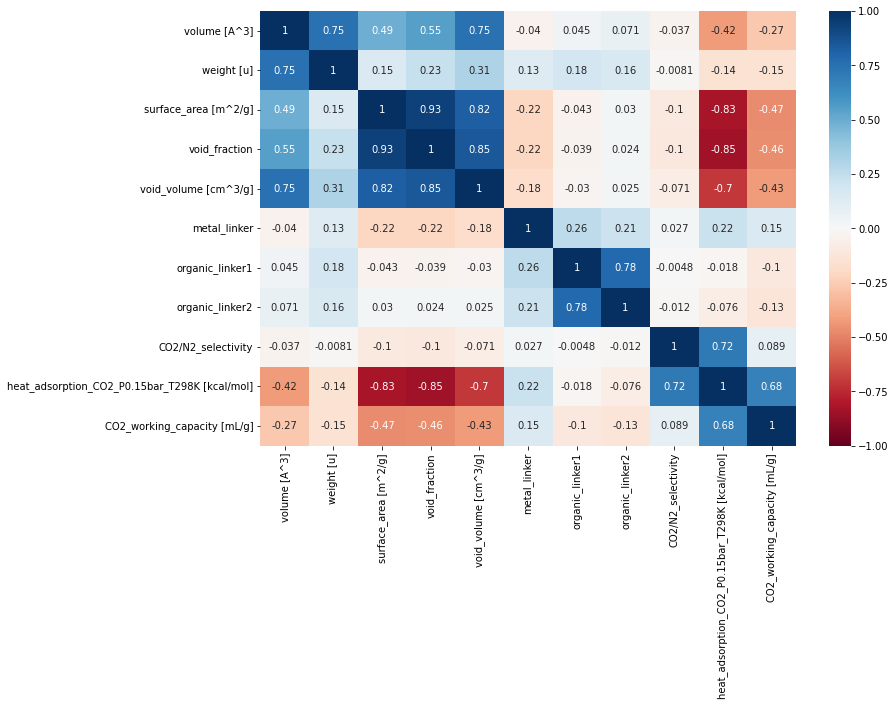

In [50]:
corr = df.drop(['MOFname'], axis = 1).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, vmin = -1, vmax = 1, cmap = 'RdBu', annot = True)